In [8]:
%matplotlib inline
from svm_classifier import getClassifierAndVectorizer
import numpy as np
import glob, os, pickle
import math
import pickle
import collections
import operator
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from operator import itemgetter

print('test')

test


In [4]:
clf, vectorizer = getClassifierAndVectorizer()

imported correctly


/Users/liammeier/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [5]:
def extractor(n=10000):
    #n is number of opinions from each year"
    filename = "sentences_new/"
    datafiles = sorted(glob.glob(filename + "sent_????"))
    test_files = []
    year = []
    cases_per_year = []
    y = 1891
    case_names = []
    a = 0
    for d in datafiles:
        sentences = sorted(glob.glob(d + "/*.txt"))
        for i, sentence in enumerate(sentences):
            if i >= n:
                break
            myfile = open(sentence,'r') 
            data=myfile.read().replace('\n', '')
            test_files.append(data)
            year.append(y)

            #adding case no and judge no.
            case_n = ""
            flag = False
            for j in sentence:
                if j == "X":
                    flag = True
                if j == "_":
                    flag = False
                if j == ".":
                    flag = False
                if flag == True:
                    case_n += j
            case_names.append(case_n)

            myfile.close()
        cases_per_year.append(len(sentences))
        y += 1
    print(a)
    return test_files, year, cases_per_year, case_names

def loadDataset(pklPath):
    with open(pklPath, "rb") as pklFile:
        return np.array(pickle.load(pklFile, encoding="utf-8"))

In [6]:
#x_test = vectorizer.transform(data_to_predict)
clf, vectorizer = getClassifierAndVectorizer()
cases, year_of_case, cases_per_year, case_names = extractor()
x_test = vectorizer.transform(cases)
prediction = clf.predict(x_test)


imported correctly


/Users/liammeier/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


0


In [45]:
n_grams = vectorizer.get_feature_names()
coef = clf.coef_[0].tolist()
print(len(coef))
top = 100
predictors = []
print(len(n_grams))
print(len(coef))
for i in range(top):
    val = min(coef)
    index = coef.index(val)
    predictors.append([n_grams[index], val])
    n_grams.pop(index)
    coef.pop(index)
for i in range(top):
    val = max(coef)
    index = coef.index(val)
    predictors.append([n_grams[index], val])
    n_grams.pop(index)
    coef.pop(index)
for i in predictors:
    print (i ,"\n")

259634
259634
259634
['\\xe2\\x80\\x94', -0.3927211661311737] 

["'s", -0.38739522434028156] 

['rule', -0.3767366616134368] 

['ideal', -0.36550423359983647] 

['pleasure', -0.3604976896498706] 

['nora', -0.35859957203803067] 

[', :', -0.35778521010195286] 

['consequentialism', -0.35437578799341757] 

['experienced', -0.3355344184418251] 

['code', -0.3348026945031261] 

['jones', -0.32743933286280374] 

['global', -0.3258140783128829] 

['best', -0.32062746374139994] 

['job', -0.3118041839821037] 

['mental', -0.3103986246220885] 

['global consequentialism', -0.30233920953135657] 

['the ideal', -0.3004766040699422] 

['level', -0.2719840506399788] 

['utilitarian', -0.2700220465471434] 

['contribution', -0.2683347369853191] 

['accident', -0.26345651638035533] 

['experienced harm', -0.2540629096303204] 

['pain', -0.24807235767777272] 

['ideal code', -0.2467210091454803] 

['consequence', -0.24524311001356636] 

['the best', -0.24451659920509602] 

['illness', -0.24347494215

In [9]:
cases, year_of_case, cases_per_year, case_names = extractor()

0


In [9]:
def extractorForPara(n=10000):
    #n is number of opinions from each year"
    filename = "paragraphs/"
    datafiles = sorted(glob.glob(filename + "para_????"))
    test_files = []

    for d in datafiles:
        paragraphs = sorted(glob.glob(d + "/*.pkl"))
        for i, para in enumerate(paragraphs):
            if i > n:
                break
            myfile = loadDataset(para)
            for j in myfile:
                if len(j) > 200:
                    test_files.append(j)

    return test_files

In [10]:
paragraphs = extractorForPara(10) #run this without arguments for full analysis
x_test_para = vectorizer.transform(paragraphs)
prediction_para = clf.predict(x_test_para)

In [11]:
#Rank paragraohs



proba = clf.decision_function(x_test_para)
temp_proba = proba.copy().tolist()

consPara = []
deonPara = []

for i in range(100):
    #range determines how many 'top' paragraphs to find
    max_val = max(temp_proba)
    max_index = temp_proba.index(max_val)

    min_val = min(temp_proba)
    min_index = temp_proba.index(min_val)

    consPara.append(min_index)
    deonPara.append(max_index)

    temp_proba[max_index], temp_proba[min_index] = 0, 0

print(len(consPara))
print("Strongly Consequentialist")
for i in range(10):
    print(paragraphs[consPara[i]])
    print('\n')
print("Strongly Deontologist")
for j in range(10):
    print(paragraphs[deonPara[j]])
    print('\n')

100
Strongly Consequentialist
The plaintiff's device is simply another illustration of the use of indicia as an aid in selecting articles that might be subject to confusion. The carpenter's cabinet for augur bits, the druggist's medicine cabinet, the hotel keeper's rack for room keys, are other examples.


In Anderson's reply brief on direct appeal, Anderson's counsel addressed the effect of Apprendi on Anderson's sentence but not on the validity of Anderson's guilty plea.[fn3] Reply Brief of Appellant at 5, 6, United States v. Anderson, 243 F.3d 478 (8th Cir. 2001). Appellate counsel's failure to argue that Anderson's plea violated Rule 11 because Anderson was misinformed, in light of Apprendi, about the potential sentence range for his crime forms the basis of Anderson's ineffective assistance of counsel motion. The District Court denied Anderson's motion, finding that even if Anderson's appellate counsel was ineffective, Anderson was not prejudiced by counsel's performance. Anderson

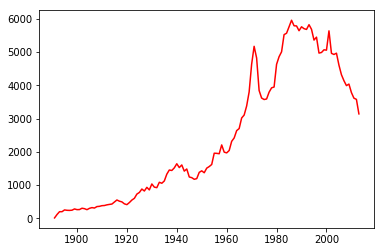

In [8]:
#for i, j in zip(attrib, prediction):
#        print('%r => %s' % (i, j))

#consPerYear = dict((yr,0) for yr in range(1891, 2014)) 
#deonPerYear = dict((yr,0) for yr in range(1891, 2014))
years = range(1891,2014)
consPerYear, deonPerYear = np.zeros(len(years)), np.zeros(len(years))
for i, j in zip(year_of_case, prediction):
    if j == "cons":
        consPerYear[i - 1891] += 1
    if j == "deon":
        deonPerYear[i - 1891] += 1
        
        
plt.plot(years, consPerYear, 'r')
#plt.plot(years, deonPerYear)
#plt.show()

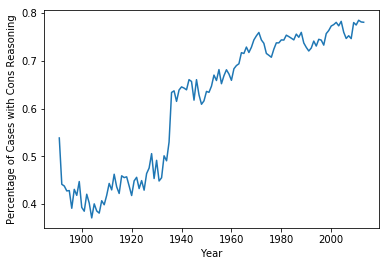

In [19]:
percentages = [] #consPerYear / cases_per_year
for i, j in zip(consPerYear, cases_per_year):
    if j < 10000:
        percentages.append(i/float(j))
    else:
        percentages.append(i/100)
plt.plot(years, percentages)
plt.xlabel("Year")
plt.ylabel("Percentage of Cases with Cons Reasoning")
plt.savefig("timeseries.png", dpi=300)

In [10]:
topics = loadDataset("/Users/liammeier/moral-reasoning/bb2topic.pkl")
topicDict = dict()
topicSet = set()
for key, value in topics[()].items():
    topicDict[key] = value
    topicSet.add(value)
print(topicDict['X3TQ24'])
print(topicSet)

Tax & Accounting
{'', 'Labor Law', 'Entertainment Law', 'Securities Law', 'Damages & Remedies', 'Agricultural Law', 'Elections & Politics', 'Consumer Law', 'Environmental Law', 'Antitrust & Trade', 'Government', 'Landlord & Tenant', 'Banking & Finance', "Prisoners' Rights", 'Employment Law', 'Sports Law', 'Eminent Domain', 'Postal Service Law', 'Medical Malpractice', 'Professional Responsibility', 'Hazardous Material Law', 'Intellectual Property Treaties & Conventions', 'Conflict of Laws', 'Communications & Media', 'Energy Law', 'Real Property', 'Immigration & Naturalization', 'Debtor Creditor', 'Trade Secrets', 'Insurance Law', 'Transportation Law', 'Criminal Law', 'Construction Law', 'International Trade Law', 'Civil Procedure', 'Appellate Procedure', 'Land Use Planning & Zoning', 'Tax & Accounting', 'Civil Rights', 'Class Actions', 'Government Contracts', 'Habeas Corpus', 'Patent Law', 'Health Law', 'Contracts', 'Alternative Dispute Resolution', 'Personal Property', 'Privacy & Infor

In [23]:
topicTotal = dict.fromkeys(topicSet, 0)
topicCons = dict.fromkeys(topicSet, 0)
#cases, year_of_case, cases_per_year, case_names = extractor()
for c, p in zip(case_names, prediction):
    try:
        top = topicDict[c]
    except:
        #print("This isn't in the topicDict  ", c)
        continue
    if top != '':
        topicTotal[top] += 1
        if p == 'cons':
            topicCons[top] += 1
            
for key, value in topicTotal.items():
    if value < 10:
        topicSet.remove(key)
topicPercentages = {s:(topicCons[s]/topicTotal[s]) for s in topicSet}



print(sorted(topicPercentages.items(), key=itemgetter(1)))
#print(topicTotal)

[('Wills, Trusts & Estates', 0.4471476510067114), ('Negotiable Instruments', 0.5017667844522968), ('Family Law', 0.5262430939226519), ('Torts', 0.5263875123885035), ('Real Property', 0.5402611534276387), ('Admiralty & Maritime', 0.5493772801610265), ('Native Peoples', 0.5676274944567627), ('Judicial Ethics & Conduct', 0.5714285714285714), ('Natural Resources', 0.5768115942028985), ('Mortgages & Liens', 0.580368906455863), ('Real Estate Investment Trusts', 0.5862068965517241), ('Damages & Remedies', 0.5883022774327122), ('Landlord & Tenant', 0.5913793103448276), ('Debtor Creditor', 0.6008804108584006), ('Bankruptcy Law', 0.6035031847133758), ('Alcohol & Beverage', 0.6124794745484401), ('Motor Vehicles & Traffic Law', 0.6146341463414634), ('Legal Malpractice', 0.6181818181818182), ('Personal Property', 0.6234567901234568), ('Eminent Domain', 0.6267166042446941), ('Corporate Law', 0.6274426508071368), ('Entertainment Law', 0.6333333333333333), ('Contracts', 0.6377381054070215), ('Professi

In [39]:
def MajVsDisExtractor():

    filename = "sentences_new/"
    datafiles = sorted(glob.glob(filename + "sent_????"))
    test_files = []
    maj_op = []
    dis_op = []

    d = datafiles[1920-1932]
    sentences = sorted(glob.glob(d + "/*.txt"))

    for i in range(len(sentences)):
        myfile = open(sentences[i],'r')
        data=myfile.read().replace('\n', '')
        if "MajOp" in sentences[i]:
            maj_op.append(data)
        elif "DisOp" in sentences[i]:
            dis_op.append(data)
    
        myfile.close()
    return maj_op, dis_op

In [38]:
majOp, disOp = MajVsDisExtractor()
majTest = vectorizer.transform(majOp)
predictionMaj = clf.predict(majTest)
disTest = vectorizer.transform(disOp)
predictionDis = clf.predict(disTest)

majOp, disOp = MajVsDisExtractor()
majTest = vectorizer.transform(majOp)
predictionMaj = clf.predict(majTest)
disTest = vectorizer.transform(disOp)
predictionDis = clf.predict(disTest)

In [1]:
percentMajCons = predictionMaj.tolist().count('cons') / len(majOp)
percentDisCons = predictionDis.tolist().count('cons') / len(disOp)
plt.bar("Majority", percentMajCons)
plt.bar("Dissenting", percentDisCons)
print(percentMajCons)
print(percentDisCons)
plt.savefig("MajDis.png")

NameError: name 'predictionMaj' is not defined

In [11]:
def loadDataset(pklPath):
    with open(pklPath, "rb") as pklFile:
        return np.array(pickle.load(pklFile, encoding="utf-8"))

In [191]:
genis = loadDataset("/Users/liammeier/moral-reasoning/bb2genis.pkl")
md = pd.read_stata("/Users/liammeier/moral-reasoning/circuit_metadata_excerpt.dta") #md for metadata

In [80]:
print(md.keys())

Index(['caseid', 'Circuit', 'j', 'date', 'songername', 'Affirmed',
       'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated',
       'VacatedInPart', 'Remanded', 'Dissenting1', 'Author', 'Writer'],
      dtype='object')


In [192]:
#print(metadata['songername'])
#print(df.keys())
#print(type(df))
currmd = md.set_index('Writer')
md = md.set_index('caseid')

In [77]:
print(current_md)
#print(md['Author'])
#print(md['Author']['POSNER'])
md.keys()

               caseid  Circuit  j       date                  songername  \
Author                                                                     
MOTZ       X101L14003        4  2 2004-03-24         DUNCAN, ALLYSON KAY   
MOTZ       X101L14003        4  3 2004-03-24          KING, ROBERT BRUCE   
MOTZ       X101L14003        4  1 2004-03-24         MOTZ, DIANA GRIBBON   
WILKINSON  X10284I003        4  3 2004-03-31          LUTTIG, J. MICHAEL   
WILKINSON  X10284I003        4  1 2004-03-31   WILKINSON, J. HARVIE, III   
WILKINSON  X10284I003        4  2 2004-03-31  TRAXLER, WILLIAM BYRD, JR.   
RENDELL    X102UPO003        3  3 2004-04-05        RENDELL, MARJORIE O.   
RENDELL    X102UPO003        3  1 2004-04-05        SLOVITER, DOLORES K.   
RENDELL    X102UPO003        3  2 2004-04-05           ALDISERT, RUGGERO   
             X103660N        9  1 1994-07-25        HUG, PROCTER R., JR.   
             X103660N        9  3 1994-07-25      SCHROEDER, MARY MURPHY   
            

Index(['caseid', 'Circuit', 'j', 'date', 'songername', 'Affirmed',
       'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated',
       'VacatedInPart', 'Remanded', 'Dissenting1', 'Author', 'Writer'],
      dtype='object')

In [193]:
c = md.loc['XB0P8NQNB5G0']
print(c)
a = md.loc['XB0OIFQNB5G0']['Author'].iloc[0]
print(a)
s = c['songername']
for i, name in enumerate(s):
    if a in name:
        correctName = name

print(correctName)

              Circuit  j date songername  Affirmed  AffirmedInPart  Reversed  \
caseid                                                                         
XB0P8NQNB5G0        8  1  NaT                  1.0             0.0       0.0   
XB0P8NQNB5G0        8  3  NaT                  1.0             0.0       0.0   
XB0P8NQNB5G0        8  2  NaT                  1.0             0.0       0.0   

              ReversedInPart  Vacated  VacatedInPart  Remanded  Dissenting1  \
caseid                                                                        
XB0P8NQNB5G0             0.0      0.0            0.0       0.0          3.0   
XB0P8NQNB5G0             0.0      0.0            0.0       0.0          3.0   
XB0P8NQNB5G0             0.0      0.0            0.0       0.0          3.0   

             Author  Writer  
caseid                       
XB0P8NQNB5G0            NaN  
XB0P8NQNB5G0            NaN  
XB0P8NQNB5G0            NaN  




In [143]:
#print(len(case_names))
#print(case_names[200])
#print(md.loc['XB0OI7QNB5G0'])
#print(md.loc['XB0OI7QNB5G0'].keys())
#print(md.loc['XB0OI7QNB5G0']['Author'])
#print(md.loc['XFLJGO']['songername'])
print(md.loc['XFLJGO']['Author'])
#print(md.loc['XFLJGO'])


caseid
XFLJGO    DEADY
XFLJGO    DEADY
XFLJGO    DEADY
Name: Author, dtype: object


In [146]:
nah = 0
caseToAuthorDict = dict()
print("Test")
print(len(case_names))
for case in case_names:
    try:
        c =  md.loc[case]
        author = c['Author'].iloc[0]
        songername = c['songername']
        for name in songername:   
            if author in name:
                caseToAuthorDict[case] = name
    except:
        nah += 1
print(caseToAuthorDict)
print(nah)

Test
427315


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [176]:
values = caseToAuthorDict.values()
authorSet = set(values)
#print(authorSet)
authorTotal = dict.fromkeys(authorSet, 0)
authorCons = dict.fromkeys(authorSet, 0)
#cases, year_of_case, cases_per_year, case_names = extractor()
for c, p in zip(case_names, prediction):
    try:
        auth = caseToAuthorDict[c]
    except:
        #print("This isn't in the topicDict  ", c)
        continue
    if auth != '':
        authorTotal[auth] += 1
        if p == 'cons':
            authorCons[auth] += 1

#filteredAuthorCons = dict.fromkeys(authorSet, 0)
#filteredAuthorTotal =  dict.fromkeys(authorSet, 0)
for key, value in authorTotal.items():
    if value < 50:
        try:
            authorSet.remove(key)
        except:
            #print("This wasn't removed ,", key)
            continue
            
#filteredAuthorPercentages = {s:(authorCons[s]/(authorTotal[s] + 0.1)) for s in authorSet}

authorPercentages = {s:(authorCons[s]/(authorTotal[s])) for s in authorSet}



In [188]:
for idx, j in enumerate(sorted(authorPercentages, key=authorPercentages.get)):
    if idx < 10:
        print(j, authorPercentages[j])

TRIEBER, JACOB 0.2129032258064516
VAN DEVANTER, WILLIS 0.2196969696969697
COTTERALL, JOHN H. 0.24375
REED, HENRY THOMAS 0.24561403508771928
KENYON, WILLIAM 0.25333333333333335
MCDOWELL, HENRY CLAY 0.25862068965517243
HAWLEY, THOMAS PORTER 0.26595744680851063
BOOTH, WILBUR F. 0.2755417956656347
PHILIPS, JOHN FINIS 0.2755905511811024
PRITCHARD, JETER C. 0.2857142857142857


In [53]:
posner_cases = []
for case in case_names:
    try:
        c= md.loc[case]
        author = c['Author'].iloc[0]
        songername = c['songername']
        #print("check")
        if "POSNER" in author: # and "RICHARD" in songername and "POSNER" in author: #or "POSNER" in songername:
            posner_cases.append(case)
            if "POSNER" not in songername:
                print(songername)
    except:
        continue
        
print(posner_cases)

caseid
X3PAIR    SPRECHER, ROBERT A.
X3PAIR       CUMMINGS, WALTER
X3PAIR     POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3PAJ8       SWYGERT, LUTHER
X3PAJ8    CUDAHY, RICHARD D.
X3PAJ8    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4ARKD       SWYGERT, LUTHER
X4ARKD    POSNER, RICHARD A.
X4ARKD    CUDAHY, RICHARD D.
Name: songername, dtype: object
caseid
X2O0CC       POSNER, RICHARD A.
X2O0CC        FOREMAN, JAMES L.
X2O0CC    WOOD, HARLINGTON, JR.
Name: songername, dtype: object
caseid
X2O0CC       POSNER, RICHARD A.
X2O0CC        FOREMAN, JAMES L.
X2O0CC    WOOD, HARLINGTON, JR.
Name: songername, dtype: object
caseid
X2O0FB       POSNER, RICHARD A.
X2O0FB    WOOD, HARLINGTON, JR.
X2O0FB        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X2O0G9      POSNER, RICHARD A.
X2O0G9       BAUER, WILLIAM J.
X2O0G9    LARSON, EARL RICHARD
Name: songername, dtype: object
caseid
X2O0GA    POSNER, RICHARD A.
X2O0GA       SWYGERT, LUTHER
X2O0GA     BAUER,

caseid
XABJOJ     POSNER, RICHARD A.
XABJOJ    SPRECHER, ROBERT A.
XABJOJ       CUMMINGS, WALTER
Name: songername, dtype: object
caseid
XABK1R    CUDAHY, RICHARD D.
XABK1R    POSNER, RICHARD A.
XABK1R     BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
XABK26       COFFEY, JOHN L.
XABK26    POSNER, RICHARD A.
XABK26    DAVIS, OSCAR HIRSH
Name: songername, dtype: object
caseid
XABK57      BARTELS, JOHN R.
XABK57       SWYGERT, LUTHER
XABK57    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XABK89    SPRECHER, ROBERT A.
XABK89     POSNER, RICHARD A.
XABK89       CUMMINGS, WALTER
Name: songername, dtype: object
caseid
XABK8P      POSNER, RICHARD A.
XABK8P      ESCHBACH, JESSE E.
XABK8P    NICHOLS, PHILIP, JR.
Name: songername, dtype: object
caseid
XABKAE       CUMMINGS, WALTER
XABKAE     POSNER, RICHARD A.
XABKAE    GRANT, ROBERT ALLEN
Name: songername, dtype: object
caseid
XABKAU       ESCHBACH, JESSE E.
XABKAU    WOOD, HARLINGTON, JR.
XABKAU       POSNER, RICHARD A.


caseid
X436GJ       POSNER, RICHARD A.
X436GJ    WOOD, HARLINGTON, JR.
X436GJ        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X436GO    CUDAHY, RICHARD D.
X436GO    POSNER, RICHARD A.
X436GO       PELL, WILBUR F.
Name: songername, dtype: object
caseid
X436H7             COFFEY, JOHN L.
X436H7    CAMPBELL, WILLIAM JOSEPH
X436H7          POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X436H7             COFFEY, JOHN L.
X436H7    CAMPBELL, WILLIAM JOSEPH
X436H7          POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X460EI                      
X460EI    POSNER, RICHARD A.
X460EI       PELL, WILBUR F.
Name: songername, dtype: object
caseid
X460EI                      
X460EI    POSNER, RICHARD A.
X460EI       PELL, WILBUR F.
Name: songername, dtype: object
caseid
X461H7       COFFEY, JOHN L.
X461H7    POSNER, RICHARD A.
X461H7    CUDAHY, RICHARD D.
Name: songername, dtype: object
caseid
X49V8R     BAUER, WILLIAM J.
X49V8R      CUMMINGS, WALTER
X49V8R  

caseid
X3J509    POSNER, RICHARD A.
X3J509       COFFEY, JOHN L.
X3J509       PELL, WILBUR F.
Name: songername, dtype: object
caseid
X3J50G       COFFEY, JOHN L.
X3J50G    POSNER, RICHARD A.
X3J50G    ESCHBACH, JESSE E.
Name: songername, dtype: object
caseid
X3J51H    POSNER, RICHARD A.
X3J51H       COFFEY, JOHN L.
X3J51H        FLAUM, JOEL M.
Name: songername, dtype: object
caseid
X3J51H    POSNER, RICHARD A.
X3J51H       COFFEY, JOHN L.
X3J51H        FLAUM, JOEL M.
Name: songername, dtype: object
caseid
X3J582    WOOD, HARLINGTON, JR.
X3J582       POSNER, RICHARD A.
X3J582        REYNOLDS, JOHN W.
Name: songername, dtype: object
caseid
X3J58M       POSNER, RICHARD A.
X3J58M       ESCHBACH, JESSE E.
X3J58M    WOOD, HARLINGTON, JR.
Name: songername, dtype: object
caseid
X3J594       POSNER, RICHARD A.
X3J594         CUMMINGS, WALTER
X3J594    WOOD, HARLINGTON, JR.
Name: songername, dtype: object
caseid
X3J595    POSNER, RICHARD A.
X3J595    CUDAHY, RICHARD D.
X3J595        FLAUM, JOEL 

Name: songername, dtype: object
caseid
XABPI5    POSNER, RICHARD A.
XABPI5    KELLAM, RICHARD B.
XABPI5       COFFEY, JOHN L.
Name: songername, dtype: object
caseid
XAFFO5              FLAUM, JOEL M.
XAFFO5          POSNER, RICHARD A.
XAFFO5    CAMPBELL, WILLIAM JOSEPH
Name: songername, dtype: object
caseid
X2NRG5       POSNER, RICHARD A.
X2NRG5    WOOD, HARLINGTON, JR.
X2NRG5      DUMBAULD, EDWARD D.
Name: songername, dtype: object
caseid
X2NRO4    CUDAHY, RICHARD D.
X2NRO4      CUMMINGS, WALTER
X2NRO4    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X2O4O0    ESCHBACH, JESSE E.
X2O4O0         GIBSON, FLOYD
X2O4O0    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X30IP2     BAUER, WILLIAM J.
X30IP2      CUMMINGS, WALTER
X30IP2    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X30J1D          POSNER, RICHARD A.
X30J1D             SWYGERT, LUTHER
X30J1D    DUPREE, FRANKLIN T., JR.
Name: songername, dtype: object
caseid
X30J1D          POSNER, RICHARD A.

Name: songername, dtype: object
caseid
X4A9KJ    DUMBAULD, EDWARD D.
X4A9KJ        COFFEY, JOHN L.
X4A9KJ     POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4AA86           FLAUM, JOEL M.
X4AA86    EASTERBROOK, FRANK H.
X4AA86       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XABOQ0       COFFEY, JOHN L.
XABOQ0    POSNER, RICHARD A.
XABOQ0    CUDAHY, RICHARD D.
Name: songername, dtype: object
caseid
XABOQ0       COFFEY, JOHN L.
XABOQ0    POSNER, RICHARD A.
XABOQ0    CUDAHY, RICHARD D.
Name: songername, dtype: object
caseid
XABOVF    WOOD, HARLINGTON, JR.
XABOVF       POSNER, RICHARD A.
XABOVF        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
XABP16      CUMMINGS, WALTER
XABP16     BAUER, WILLIAM J.
XABP16    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XABP8V        FLAUM, JOEL M.
XABP8V    POSNER, RICHARD A.
XABP8V    CUDAHY, RICHARD D.
Name: songername, dtype: object
caseid
XABPBF    BROWN, WESLEY ERNEST
XABPBF      CUDAHY, RICHARD

Name: songername, dtype: object
caseid
X3I2A6    EASTERBROOK, FRANK H.
X3I2A6        BAUER, WILLIAM J.
X3I2A6       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3I2A6    EASTERBROOK, FRANK H.
X3I2A6        BAUER, WILLIAM J.
X3I2A6       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3I2BS    EASTERBROOK, FRANK H.
X3I2BS           FLAUM, JOEL M.
X3I2BS       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3I2C3          POSNER, RICHARD A.
X3I2C3    CAMPBELL, WILLIAM JOSEPH
X3I2C3            CUMMINGS, WALTER
Name: songername, dtype: object
caseid
X3I2C3          POSNER, RICHARD A.
X3I2C3    CAMPBELL, WILLIAM JOSEPH
X3I2C3            CUMMINGS, WALTER
Name: songername, dtype: object
caseid
X3I2C9    ESCHBACH, JESSE E.
X3I2C9    POSNER, RICHARD A.
X3I2C9        FLAUM, JOEL M.
Name: songername, dtype: object
caseid
X3I2CP        BAUER, WILLIAM J.
X3I2CP    EASTERBROOK, FRANK H.
X3I2CP       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3I2EA 

caseid
X33G3K       POSNER, RICHARD A.
X33G3K        PARSONS, JAMES B.
X33G3K    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X33G3K       POSNER, RICHARD A.
X33G3K        PARSONS, JAMES B.
X33G3K    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X33GHJ       POSNER, RICHARD A.
X33GHJ       RIPPLE, KENNETH F.
X33GHJ    WOOD, HARLINGTON, JR.
Name: songername, dtype: object
caseid
X33GI1       CUDAHY, RICHARD D.
X33GI1       POSNER, RICHARD A.
X33GI1    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X33GID       POSNER, RICHARD A.
X33GID    WOOD, HARLINGTON, JR.
X33GID    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X33GJ2          POSNER, RICHARD A.
X33GJ2    CAMPBELL, WILLIAM JOSEPH
X33GJ2          RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X33GJ2          POSNER, RICHARD A.
X33GJ2    CAMPBELL, WILLIAM JOSEPH
X33GJ2          RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X33GLE    POSNER, RICHARD A.
X

caseid
XAFI5A           FLAUM, JOEL M.
XAFI5A       POSNER, RICHARD A.
XAFI5A    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
XAFI6R     KANNE, MICHAEL S.
XAFI6R     MANION, DANIEL A.
XAFI6R    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XAFI9H    WOOD, HARLINGTON, JR.
XAFI9H        BAUER, WILLIAM J.
XAFI9H       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XAFIB3    EASTERBROOK, FRANK H.
XAFIB3       POSNER, RICHARD A.
XAFIB3        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
XAFIBC       POSNER, RICHARD A.
XAFIBC    EASTERBROOK, FRANK H.
XAFIBC        MANION, DANIEL A.
Name: songername, dtype: object
caseid
XAFIDF    POSNER, RICHARD A.
XAFIDF        FLAUM, JOEL M.
XAFIDF     BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
XAFIDH       POSNER, RICHARD A.
XAFIDH    EASTERBROOK, FRANK H.
XAFIDH        MANION, DANIEL A.
Name: songername, dtype: object
caseid
XAFIEN    EASTERBROOK, FRANK H.
XAFIEN          COFFEY, JOHN L.
XA

Name: songername, dtype: object
caseid
X4AJAE     MANION, DANIEL A.
X4AJAE    POSNER, RICHARD A.
X4AJAE      CUMMINGS, WALTER
Name: songername, dtype: object
caseid
XAC0BJ        FLAUM, JOEL M.
XAC0BJ     KANNE, MICHAEL S.
XAC0BJ    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XAC0BJ        FLAUM, JOEL M.
XAC0BJ     KANNE, MICHAEL S.
XAC0BJ    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XAFILS    EASTERBROOK, FRANK H.
XAFILS        BAUER, WILLIAM J.
XAFILS       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XAFJ4B    EASTERBROOK, FRANK H.
XAFJ4B       POSNER, RICHARD A.
XAFJ4B          COFFEY, JOHN L.
Name: songername, dtype: object
caseid
XAFJJG      CUMMINGS, WALTER
XAFJJG    CUDAHY, RICHARD D.
XAFJJG    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XAFJJU       POSNER, RICHARD A.
XAFJJU    WOOD, HARLINGTON, JR.
XAFJJU       ESCHBACH, JESSE E.
Name: songername, dtype: object
caseid
XAFJLL      CUMMINGS, WALTER
XAFJLL    POSNER, RICHA

Name: songername, dtype: object
caseid
X46C5B    POSNER, RICHARD A.
X46C5B     BAUER, WILLIAM J.
X46C5B       WILL, HUBERT L.
Name: songername, dtype: object
caseid
X46C5F    RIPPLE, KENNETH F.
X46C5F     BAUER, WILLIAM J.
X46C5F    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X46C5P    POSNER, RICHARD A.
X46C5P    RIPPLE, KENNETH F.
X46C5P    CUDAHY, RICHARD D.
Name: songername, dtype: object
caseid
X46C9G    RIPPLE, KENNETH F.
X46C9G     MANION, DANIEL A.
X46C9G    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X46CGP    CUDAHY, RICHARD D.
X46CGP    POSNER, RICHARD A.
X46CGP      CUMMINGS, WALTER
Name: songername, dtype: object
caseid
X4S93C    RIPPLE, KENNETH F.
X4S93C    CUDAHY, RICHARD D.
X4S93C    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4S93C    RIPPLE, KENNETH F.
X4S93C    CUDAHY, RICHARD D.
X4S93C    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4S93C    RIPPLE, KENNETH F.
X4S93C    CUDAHY, RICHARD D.
X4S93C    POSNER, RIC

Name: songername, dtype: object
caseid
X3A7MO    DUMBAULD, EDWARD D.
X3A7MO     POSNER, RICHARD A.
X3A7MO         FLAUM, JOEL M.
Name: songername, dtype: object
caseid
X3IHKG     BAUER, WILLIAM J.
X3IHKG        FLAUM, JOEL M.
X3IHKG    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3IHNS       POSNER, RICHARD A.
X3IHNS        MANION, DANIEL A.
X3IHNS    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X3IHRN       POSNER, RICHARD A.
X3IHRN    EASTERBROOK, FRANK H.
X3IHRN        FAIRCHILD, THOMAS
Name: songername, dtype: object
caseid
X3IHRN       POSNER, RICHARD A.
X3IHRN    EASTERBROOK, FRANK H.
X3IHRN        FAIRCHILD, THOMAS
Name: songername, dtype: object
caseid
X3IHRT      SNEED, JOSEPH T.
X3IHRT    POSNER, RICHARD A.
X3IHRT     KANNE, MICHAEL S.
Name: songername, dtype: object
caseid
X3IHTB     KANNE, MICHAEL S.
X3IHTB    POSNER, RICHARD A.
X3IHTB      SNEED, JOSEPH T.
Name: songername, dtype: object
caseid
X3IHTK       POSNER, RICHARD A.
X3IHTK        MAN

Name: songername, dtype: object
caseid
X30LUJ      CUMMINGS, WALTER
X30LUJ     BAUER, WILLIAM J.
X30LUJ    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X31UL9     BAUER, WILLIAM J.
X31UL9    POSNER, RICHARD A.
X31UL9    RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X31UL9     BAUER, WILLIAM J.
X31UL9    POSNER, RICHARD A.
X31UL9    RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X31ULF     BAUER, WILLIAM J.
X31ULF    RIPPLE, KENNETH F.
X31ULF    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X31ULF     BAUER, WILLIAM J.
X31ULF    RIPPLE, KENNETH F.
X31ULF    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X31V2G       PELL, WILBUR F.
X31V2G     BAUER, WILLIAM J.
X31V2G    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X31V31    POSNER, RICHARD A.
X31V31     MANION, DANIEL A.
X31V31      CUMMINGS, WALTER
Name: songername, dtype: object
caseid
X320D3     KANNE, MICHAEL S.
X320D3     MANION, DANIEL A.
X320D3    POSNER, RIC

caseid
X354BV      POSNER, RICHARD A.
X354BV    VAN SICKLE, BRUCE M.
X354BV       KANNE, MICHAEL S.
Name: songername, dtype: object
caseid
X356EI    POSNER, RICHARD A.
X356EI     FAIRCHILD, THOMAS
X356EI     MANION, DANIEL A.
Name: songername, dtype: object
caseid
X356KV    POSNER, RICHARD A.
X356KV    RIPPLE, KENNETH F.
X356KV       COFFEY, JOHN L.
Name: songername, dtype: object
caseid
X3576K      POSNER, RICHARD A.
X3576K       MANION, DANIEL A.
X3576K    VAN SICKLE, BRUCE M.
Name: songername, dtype: object
caseid
X3576V    RIPPLE, KENNETH F.
X3576V     MANION, DANIEL A.
X3576V    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X357MR    POSNER, RICHARD A.
X357MR     BAUER, WILLIAM J.
X357MR      NOLAND, JAMES E.
Name: songername, dtype: object
caseid
X357N4       COFFEY, JOHN L.
X357N4    POSNER, RICHARD A.
X357N4        FLAUM, JOEL M.
Name: songername, dtype: object
caseid
X357NA          PELL, WILBUR F.
X357NA    EASTERBROOK, FRANK H.
X357NA       POSNER, RICHARD A.
Nam

Name: songername, dtype: object
caseid
X30NL4    POSNER, RICHARD A.
X30NL4     BAUER, WILLIAM J.
X30NL4       WILL, HUBERT L.
Name: songername, dtype: object
caseid
X30NTI    POSNER, RICHARD A.
X30NTI      CUMMINGS, WALTER
X30NTI        FLAUM, JOEL M.
Name: songername, dtype: object
caseid
X330HS        RONEY, PAUL H.
X330HS     BAUER, WILLIAM J.
X330HS    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X330J8        FLAUM, JOEL M.
X330J8     KANNE, MICHAEL S.
X330J8    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X330JQ    WOOD, HARLINGTON, JR.
X330JQ       POSNER, RICHARD A.
X330JQ    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X330KH     MANION, DANIEL A.
X330KH      CUMMINGS, WALTER
X330KH    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X330KU       POSNER, RICHARD A.
X330KU      TIMBERS, WILLIAM H.
X330KU    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X3536R     KANNE, MICHAEL S.
X3536R    POSNER, RICHARD A.
X35

Name: songername, dtype: object
caseid
X4OFR3    WOOD, HARLINGTON, JR.
X4OFR3        MANION, DANIEL A.
X4OFR3       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4OFVR     FOREMAN, JAMES L.
X4OFVR     MANION, DANIEL A.
X4OFVR    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4OG00    POSNER, RICHARD A.
X4OG00    CUDAHY, RICHARD D.
X4OG00     KANNE, MICHAEL S.
Name: songername, dtype: object
caseid
X4OG0N    POSNER, RICHARD A.
X4OG0N       ZAGEL, JAMES B.
X4OG0N      CUMMINGS, WALTER
Name: songername, dtype: object
caseid
X4OUEM    POSNER, RICHARD A.
X4OUEM     BAUER, WILLIAM J.
X4OUEM    ESCHBACH, JESSE E.
Name: songername, dtype: object
caseid
X4PTTR      MANION, DANIEL A.
X4PTTR    GRANT, ROBERT ALLEN
X4PTTR     POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4PU78      CUMMINGS, WALTER
X4PU78    POSNER, RICHARD A.
X4PU78     BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X4PU83    POSNER, RICHARD A.
X4PU83     BAUER, WILLIAM J.
X4PU83   

Name: songername, dtype: object
caseid
X3901E       COFFEY, JOHN L.
X3901E    POSNER, RICHARD A.
X3901E        FLAUM, JOEL M.
Name: songername, dtype: object
caseid
X391JV     BAUER, WILLIAM J.
X391JV     KANNE, MICHAEL S.
X391JV    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X391K1    EASTERBROOK, FRANK H.
X391K1       POSNER, RICHARD A.
X391K1        KANNE, MICHAEL S.
Name: songername, dtype: object
caseid
X391K3     KANNE, MICHAEL S.
X391K3     BAUER, WILLIAM J.
X391K3    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X391K6    POSNER, RICHARD A.
X391K6     BAUER, WILLIAM J.
X391K6    CUDAHY, RICHARD D.
Name: songername, dtype: object
caseid
X391L6    POSNER, RICHARD A.
X391L6     BAUER, WILLIAM J.
X391L6     KANNE, MICHAEL S.
Name: songername, dtype: object
caseid
X391LB    EASTERBROOK, FRANK H.
X391LB    ROVNER, ILANA DIAMOND
X391LB       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X391LD    ROVNER, ILANA DIAMOND
X391LD    EASTERBROOK, FRANK 

caseid
XAC5RT    POSNER, RICHARD A.
XAC5RT     KANNE, MICHAEL S.
XAC5RT      CUMMINGS, WALTER
Name: songername, dtype: object
caseid
X2NJ78    POSNER, RICHARD A.
X2NJ78     MANION, DANIEL A.
X2NJ78       COFFEY, JOHN L.
Name: songername, dtype: object
caseid
X2NVLB     BAUER, WILLIAM J.
X2NVLB    POSNER, RICHARD A.
X2NVLB    RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X30F8N    POSNER, RICHARD A.
X30F8N       SHABAZ, JOHN C.
X30F8N        FLAUM, JOEL M.
Name: songername, dtype: object
caseid
X30NAJ    POSNER, RICHARD A.
X30NAJ    RIPPLE, KENNETH F.
X30NAJ      CUMMINGS, WALTER
Name: songername, dtype: object
caseid
X30NAJ    POSNER, RICHARD A.
X30NAJ    RIPPLE, KENNETH F.
X30NAJ      CUMMINGS, WALTER
Name: songername, dtype: object
caseid
X30NAR         POSNER, RICHARD A.
X30NAR         RIPPLE, KENNETH F.
X30NAR    NORGLE, CHARLES R., SR.
Name: songername, dtype: object
caseid
X30NB9     KANNE, MICHAEL S.
X30NB9    POSNER, RICHARD A.
X30NB9     FAIRCHILD, THOMAS
Name: son

caseid
X49KFD       POSNER, RICHARD A.
X49KFD    EASTERBROOK, FRANK H.
X49KFD        MANION, DANIEL A.
Name: songername, dtype: object
caseid
X4NAUA     KANNE, MICHAEL S.
X4NAUA    POSNER, RICHARD A.
X4NAUA         BRIGHT, MYRON
Name: songername, dtype: object
caseid
X4NAUB    EASTERBROOK, FRANK H.
X4NAUB       POSNER, RICHARD A.
X4NAUB        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X4NB19    ROVNER, ILANA DIAMOND
X4NB19         CUMMINGS, WALTER
X4NB19       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4NB1S     MANION, DANIEL A.
X4NB1S    POSNER, RICHARD A.
X4NB1S       COFFEY, JOHN L.
Name: songername, dtype: object
caseid
X4NB1T         COFFIN, FRANK
X4NB1T     BAUER, WILLIAM J.
X4NB1T    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4NH0N     KANNE, MICHAEL S.
X4NH0N     MANION, DANIEL A.
X4NH0N    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4NH1B    POSNER, RICHARD A.
X4NH1B      CUMMINGS, WALTER
X4NH1B     BAUER, WILLIAM 

Name: songername, dtype: object
caseid
X3PJT0       POSNER, RICHARD A.
X3PJT0    EVANS, TERENCE THOMAS
X3PJT0        KANNE, MICHAEL S.
Name: songername, dtype: object
caseid
X3PLAK       COFFEY, JOHN L.
X3PLAK    POSNER, RICHARD A.
X3PLAK      CUMMINGS, WALTER
Name: songername, dtype: object
caseid
X3POR5        FLAUM, JOEL M.
X3POR5    POSNER, RICHARD A.
X3POR5    RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X3POR5        FLAUM, JOEL M.
X3POR5    POSNER, RICHARD A.
X3POR5    RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X3SIAC        FLAUM, JOEL M.
X3SIAC    POSNER, RICHARD A.
X3SIAC    CUDAHY, RICHARD D.
Name: songername, dtype: object
caseid
X3SIAO    EVANS, TERENCE THOMAS
X3SIAO    WOOD, HARLINGTON, JR.
X3SIAO       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3SIK8    POSNER, RICHARD A.
X3SIK8    CUDAHY, RICHARD D.
X3SIK8        FLAUM, JOEL M.
Name: songername, dtype: object
caseid
X3T9A1    POSNER, RICHARD A.
X3T9A1     KANNE, MICHAEL S.
X3T

Name: songername, dtype: object
caseid
X3BBER    POSNER, RICHARD A.
X3BBER       COFFEY, JOHN L.
X3BBER    RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X3BBER    POSNER, RICHARD A.
X3BBER       COFFEY, JOHN L.
X3BBER    RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X3BFUU          COFFEY, JOHN L.
X3BFUU    EASTERBROOK, FRANK H.
X3BFUU       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3KOOR    EVANS, TERENCE THOMAS
X3KOOR           FLAUM, JOEL M.
X3KOOR       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3KP4I         CUMMINGS, WALTER
X3KP4I       POSNER, RICHARD A.
X3KP4I    EVANS, TERENCE THOMAS
Name: songername, dtype: object
caseid
X3KP55    EVANS, TERENCE THOMAS
X3KP55       POSNER, RICHARD A.
X3KP55       ESCHBACH, JESSE E.
Name: songername, dtype: object
caseid
X3KP64           FLAUM, JOEL M.
X3KP64    EVANS, TERENCE THOMAS
X3KP64       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3L0FO    EVANS, TERENCE THOMAS
X3

Name: songername, dtype: object
caseid
X37P27    EASTERBROOK, FRANK H.
X37P27       POSNER, RICHARD A.
X37P27        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X37P34        MANION, DANIEL A.
X37P34       POSNER, RICHARD A.
X37P34    ROVNER, ILANA DIAMOND
Name: songername, dtype: object
caseid
X37SUO       POSNER, RICHARD A.
X37SUO        BAUER, WILLIAM J.
X37SUO    ROVNER, ILANA DIAMOND
Name: songername, dtype: object
caseid
X37T05    WOOD, DIANE PAMELA
X37T05    RIPPLE, KENNETH F.
X37T05    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X37T7H       POSNER, RICHARD A.
X37T7H        BAUER, WILLIAM J.
X37T7H    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X3BROE    ROVNER, ILANA DIAMOND
X3BROE        MANION, DANIEL A.
X3BROE       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3BRPJ    POSNER, RICHARD A.
X3BRPJ        FLAUM, JOEL M.
X3BRPJ     BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X3BRPJ    POSNER, RICHARD A.
X3BRP

caseid
X3525R    POSNER, RICHARD A.
X3525R    CUDAHY, RICHARD D.
X3525R       COFFEY, JOHN L.
Name: songername, dtype: object
caseid
X352MU    WOOD, DIANE PAMELA
X352MU     KANNE, MICHAEL S.
X352MU    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X352MU    WOOD, DIANE PAMELA
X352MU     KANNE, MICHAEL S.
X352MU    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X36AE6       CUDAHY, RICHARD D.
X36AE6    ROVNER, ILANA DIAMOND
X36AE6       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X36AEP    POSNER, RICHARD A.
X36AEP     MANION, DANIEL A.
X36AEP     BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X36AF5       POSNER, RICHARD A.
X36AF5        KANNE, MICHAEL S.
X36AF5    EVANS, TERENCE THOMAS
Name: songername, dtype: object
caseid
X36AFA    ROVNER, ILANA DIAMOND
X36AFA           FLAUM, JOEL M.
X36AFA       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X36BGP    EVANS, TERENCE THOMAS
X36BGP       WOOD, DIANE PAMELA
X36BGP       POSNER,

Name: songername, dtype: object
caseid
X4VO19          COFFEY, JOHN L.
X4VO19    EASTERBROOK, FRANK H.
X4VO19       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4VOB7    EASTERBROOK, FRANK H.
X4VOB7       RIPPLE, KENNETH F.
X4VOB7       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4VOB7    EASTERBROOK, FRANK H.
X4VOB7       RIPPLE, KENNETH F.
X4VOB7       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4VOB8       POSNER, RICHARD A.
X4VOB8    EVANS, TERENCE THOMAS
X4VOB8        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X4VR1O    EVANS, TERENCE THOMAS
X4VR1O       POSNER, RICHARD A.
X4VR1O    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X4VTNU       POSNER, RICHARD A.
X4VTNU    EASTERBROOK, FRANK H.
X4VTNU        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
XACCRP       WOOD, DIANE PAMELA
XACCRP    EASTERBROOK, FRANK H.
XACCRP       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XACCRV       POS

caseid
X3FMHI     BAUER, WILLIAM J.
X3FMHI     MANION, DANIEL A.
X3FMHI    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3FMHU       CUDAHY, RICHARD D.
X3FMHU    EVANS, TERENCE THOMAS
X3FMHU       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3FMMU       COFFEY, JOHN L.
X3FMMU    POSNER, RICHARD A.
X3FMMU     KANNE, MICHAEL S.
Name: songername, dtype: object
caseid
X3FOKG    EVANS, TERENCE THOMAS
X3FOKG        BAUER, WILLIAM J.
X3FOKG       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3FOKS     KANNE, MICHAEL S.
X3FOKS    POSNER, RICHARD A.
X3FOKS     MANION, DANIEL A.
Name: songername, dtype: object
caseid
X3FOL2       COFFEY, JOHN L.
X3FOL2     MANION, DANIEL A.
X3FOL2    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3FOLH       COFFEY, JOHN L.
X3FOLH     KANNE, MICHAEL S.
X3FOLH    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X3FOLV       POSNER, RICHARD A.
X3FOLV        KANNE, MICHAEL S.
X3FOLV    EASTERBROOK, FRANK 

caseid
X50P6S    POSNER, RICHARD A.
X50P6S     KANNE, MICHAEL S.
X50P6S     MANION, DANIEL A.
Name: songername, dtype: object
caseid
X50S2R       POSNER, RICHARD A.
X50S2R           FLAUM, JOEL M.
X50S2R    EVANS, TERENCE THOMAS
Name: songername, dtype: object
caseid
X50SFQ    WOOD, DIANE PAMELA
X50SFQ     BAUER, WILLIAM J.
X50SFQ    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X50SG2     MANION, DANIEL A.
X50SG2    POSNER, RICHARD A.
X50SG2     KANNE, MICHAEL S.
Name: songername, dtype: object
caseid
X50T9E       POSNER, RICHARD A.
X50T9E        KANNE, MICHAEL S.
X50T9E    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X50TAH       COFFEY, JOHN L.
X50TAH     BAUER, WILLIAM J.
X50TAH    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X50TE0       POSNER, RICHARD A.
X50TE0        MANION, DANIEL A.
X50TE0    EVANS, TERENCE THOMAS
Name: songername, dtype: object
caseid
X50TN3       POSNER, RICHARD A.
X50TN3    EVANS, TERENCE THOMAS
X50TN3     WILLIAMS,

Name: songername, dtype: object
caseid
X4IRFI       POSNER, RICHARD A.
X4IRFI    EASTERBROOK, FRANK H.
X4IRFI        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X4IRG1    EASTERBROOK, FRANK H.
X4IRG1    ROVNER, ILANA DIAMOND
X4IRG1       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4IRGC    RIPPLE, KENNETH F.
X4IRGC        FLAUM, JOEL M.
X4IRGC    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4IRGC    RIPPLE, KENNETH F.
X4IRGC        FLAUM, JOEL M.
X4IRGC    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4IRGN        MANION, DANIEL A.
X4IRGN    ROVNER, ILANA DIAMOND
X4IRGN       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X4IRI9    EVANS, TERENCE THOMAS
X4IRI9       POSNER, RICHARD A.
X4IRI9       RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X4IRI9    EVANS, TERENCE THOMAS
X4IRI9       POSNER, RICHARD A.
X4IRI9       RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X4IU1C    EASTERBROOK, FRANK H.
X4

caseid
XAFMTO    EASTERBROOK, FRANK H.
XAFMTO       POSNER, RICHARD A.
XAFMTO        KANNE, MICHAEL S.
Name: songername, dtype: object
caseid
XAFMU9    ROVNER, ILANA DIAMOND
XAFMU9        MANION, DANIEL A.
XAFMU9       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XAFN43    EVANS, TERENCE THOMAS
XAFN43       POSNER, RICHARD A.
XAFN43    ROVNER, ILANA DIAMOND
Name: songername, dtype: object
caseid
XAFN43    EVANS, TERENCE THOMAS
XAFN43       POSNER, RICHARD A.
XAFN43    ROVNER, ILANA DIAMOND
Name: songername, dtype: object
caseid
XAFN44       POSNER, RICHARD A.
XAFN44     WILLIAMS, ANN CLAIRE
XAFN44    EVANS, TERENCE THOMAS
Name: songername, dtype: object
caseid
XAFN4C       POSNER, RICHARD A.
XAFN4C    EASTERBROOK, FRANK H.
XAFN4C        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
XAFN4C       POSNER, RICHARD A.
XAFN4C    EASTERBROOK, FRANK H.
XAFN4C        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
XAFN92       POSNER, RICHARD A.
XAFN92        KA

Name: songername, dtype: object
caseid
X6CN14     KANNE, MICHAEL S.
X6CN14    POSNER, RICHARD A.
X6CN14     MANION, DANIEL A.
Name: songername, dtype: object
caseid
X6CND5    POSNER, RICHARD A.
X6CND5        FLAUM, JOEL M.
X6CND5     KANNE, MICHAEL S.
Name: songername, dtype: object
caseid
X6CNEE          FLAUM, JOEL M.
X6CNEE      POSNER, RICHARD A.
X6CNEE    WILLIAMS, ANN CLAIRE
Name: songername, dtype: object
caseid
X6CNN4    WILLIAMS, ANN CLAIRE
X6CNN4      POSNER, RICHARD A.
X6CNN4         COFFEY, JOHN L.
Name: songername, dtype: object
caseid
X6COO1    ROVNER, ILANA DIAMOND
X6COO1        KANNE, MICHAEL S.
X6COO1       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X6COQF    RIPPLE, KENNETH F.
X6COQF    POSNER, RICHARD A.
X6COQF       COFFEY, JOHN L.
Name: songername, dtype: object
caseid
X6COR7       WOOD, DIANE PAMELA
X6COR7       POSNER, RICHARD A.
X6COR7    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X6CP1U      POSNER, RICHARD A.
X6CP1U    WILLIAMS

caseid
X6CSFH    EASTERBROOK, FRANK H.
X6CSFH     WILLIAMS, ANN CLAIRE
X6CSFH       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X6CT8G    WILLIAMS, ANN CLAIRE
X6CT8G       MANION, DANIEL A.
X6CT8G      POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X6CT8G    WILLIAMS, ANN CLAIRE
X6CT8G       MANION, DANIEL A.
X6CT8G      POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X6CT8G    WILLIAMS, ANN CLAIRE
X6CT8G       MANION, DANIEL A.
X6CT8G      POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X6CT8N     BAUER, WILLIAM J.
X6CT8N     KANNE, MICHAEL S.
X6CT8N    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X6CT9T       POSNER, RICHARD A.
X6CT9T    EASTERBROOK, FRANK H.
X6CT9T        KANNE, MICHAEL S.
Name: songername, dtype: object
caseid
X6CTLB        FLAUM, JOEL M.
X6CTLB    POSNER, RICHARD A.
X6CTLB    RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X6CTOO       POSNER, RICHARD A.
X6CTOO        KANNE, MICHAEL S.
X6CTOO    R

Name: songername, dtype: object
caseid
XFPLO8    EASTERBROOK, FRANK H.
XFPLO8       POSNER, RICHARD A.
XFPLO8        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
XFPLO8    EASTERBROOK, FRANK H.
XFPLO8       POSNER, RICHARD A.
XFPLO8        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
XFPLPD    POSNER, RICHARD A.
XFPLPD    WOOD, DIANE PAMELA
XFPLPD    RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
XFPLPL       WOOD, DIANE PAMELA
XFPLPL    EVANS, TERENCE THOMAS
XFPLPL       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XFPOAP       POSNER, RICHARD A.
XFPOAP       WOOD, DIANE PAMELA
XFPOAP    ROVNER, ILANA DIAMOND
Name: songername, dtype: object
caseid
XFPOD1    POSNER, RICHARD A.
XFPOD1     KANNE, MICHAEL S.
XFPOD1    WOOD, DIANE PAMELA
Name: songername, dtype: object
caseid
XFSKVE    ROVNER, ILANA DIAMOND
XFSKVE       POSNER, RICHARD A.
XFSKVE     WILLIAMS, ANN CLAIRE
Name: songername, dtype: object
caseid
XFSL1E     KANNE, MICHAEL S.
XFSL1

caseid
XGK08B    EVANS, TERENCE THOMAS
XGK08B       POSNER, RICHARD A.
XGK08B       WOOD, DIANE PAMELA
Name: songername, dtype: object
caseid
XGKEIK        BAUER, WILLIAM J.
XGKEIK    EASTERBROOK, FRANK H.
XGKEIK       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XGKEJ5       POSNER, RICHARD A.
XGKEJ5    EVANS, TERENCE THOMAS
XGKEJ5        MANION, DANIEL A.
Name: songername, dtype: object
caseid
XKJ508II8BG0    ROVNER, ILANA DIAMOND
XKJ508II8BG0    EASTERBROOK, FRANK H.
XKJ508II8BG0       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
XKJ50GII8BG0    WOOD, DIANE PAMELA
XKJ50GII8BG0    POSNER, RICHARD A.
XKJ50GII8BG0     MANION, DANIEL A.
Name: songername, dtype: object
caseid
XNRUS0II8BG0    EASTERBROOK, FRANK H.
XNRUS0II8BG0       POSNER, RICHARD A.
XNRUS0II8BG0    ROVNER, ILANA DIAMOND
Name: songername, dtype: object
caseid
XNRUSGII8BG0    ROVNER, ILANA DIAMOND
XNRUSGII8BG0       POSNER, RICHARD A.
XNRUSGII8BG0       RIPPLE, KENNETH F.
Name: songername, dtype:

caseid
X151S12003       POSNER, RICHARD A.
X151S12003    EASTERBROOK, FRANK H.
X151S12003     WILLIAMS, ANN CLAIRE
Name: songername, dtype: object
caseid
X153AT6003    POSNER, RICHARD A.
X153AT6003    WOOD, DIANE PAMELA
X153AT6003    CUDAHY, RICHARD D.
Name: songername, dtype: object
caseid
X1540GU003       WOOD, DIANE PAMELA
X1540GU003       POSNER, RICHARD A.
X1540GU003    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X154LO2003    EASTERBROOK, FRANK H.
X154LO2003       POSNER, RICHARD A.
X154LO2003           FLAUM, JOEL M.
Name: songername, dtype: object
caseid
X155732003    RIPPLE, KENNETH F.
X155732003     KANNE, MICHAEL S.
X155732003    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X15573C003        FLAUM, JOEL M.
X15573C003     MANION, DANIEL A.
X15573C003    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X15ADBG003       POSNER, RICHARD A.
X15ADBG003    EVANS, TERENCE THOMAS
X15ADBG003       WOOD, DIANE PAMELA
Name: songername, dtype: objec

caseid
X16KM7S003          SYKES, DIANE S.
X16KM7S003       POSNER, RICHARD A.
X16KM7S003    ROVNER, ILANA DIAMOND
Name: songername, dtype: object
caseid
X16LJJ0003       POSNER, RICHARD A.
X16LJJ0003        KANNE, MICHAEL S.
X16LJJ0003    ROVNER, ILANA DIAMOND
Name: songername, dtype: object
caseid
X16PEV6003    WILLIAMS, ANN CLAIRE
X16PEV6003      POSNER, RICHARD A.
X16PEV6003      WOOD, DIANE PAMELA
Name: songername, dtype: object
caseid
X16PN4O003       POSNER, RICHARD A.
X16PN4O003           FLAUM, JOEL M.
X16PN4O003    EVANS, TERENCE THOMAS
Name: songername, dtype: object
caseid
X172PSQ003    EVANS, TERENCE THOMAS
X172PSQ003        KANNE, MICHAEL S.
X172PSQ003       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1734C6003        FLAUM, JOEL M.
X1734C6003    POSNER, RICHARD A.
X1734C6003       COFFEY, JOHN L.
Name: songername, dtype: object
caseid
X174FAM003     BAUER, WILLIAM J.
X174FAM003    POSNER, RICHARD A.
X174FAM003    RIPPLE, KENNETH F.
Name: songername, dtype:

caseid
X1BBH0I003         POSNER, RICHARD A.
X1BBH0I003    VAN BOKKELEN, JOSEPH S.
X1BBH0I003            SYKES, DIANE S.
Name: songername, dtype: object
caseid
X1BBH0I003         POSNER, RICHARD A.
X1BBH0I003    VAN BOKKELEN, JOSEPH S.
X1BBH0I003            SYKES, DIANE S.
Name: songername, dtype: object
caseid
X1BCRNM003     BAUER, WILLIAM J.
X1BCRNM003    POSNER, RICHARD A.
X1BCRNM003       TINDER, JOHN D.
Name: songername, dtype: object
caseid
X1BDHD4003    WOOD, DIANE PAMELA
X1BDHD4003        FLAUM, JOEL M.
X1BDHD4003    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1BDS8G003    POSNER, RICHARD A.
X1BDS8G003    CUDAHY, RICHARD D.
X1BDS8G003     KANNE, MICHAEL S.
Name: songername, dtype: object
caseid
X1BDS8I003       SYKES, DIANE S.
X1BDS8I003     KANNE, MICHAEL S.
X1BDS8I003    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1BEFBS003    CUDAHY, RICHARD D.
X1BEFBS003       TINDER, JOHN D.
X1BEFBS003    POSNER, RICHARD A.
Name: songername, dtype: object
case

caseid
X1DHV84003       WOOD, DIANE PAMELA
X1DHV84003    EASTERBROOK, FRANK H.
X1DHV84003       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1DJJNK003       POSNER, RICHARD A.
X1DJJNK003    EASTERBROOK, FRANK H.
X1DJJNK003    EVANS, TERENCE THOMAS
Name: songername, dtype: object
caseid
X1DKRNM003    EVANS, TERENCE THOMAS
X1DKRNM003       POSNER, RICHARD A.
X1DKRNM003        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X1DLQ36003       WOOD, DIANE PAMELA
X1DLQ36003    HAMILTON, DAVID FRANK
X1DLQ36003       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1DLQ3A003       POSNER, RICHARD A.
X1DLQ3A003    HAMILTON, DAVID FRANK
X1DLQ3A003       WOOD, DIANE PAMELA
Name: songername, dtype: object
caseid
X1DP23A003          SYKES, DIANE S.
X1DP23A003    ROVNER, ILANA DIAMOND
X1DP23A003       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1E1JFS003        KANNE, MICHAEL S.
X1E1JFS003    EASTERBROOK, FRANK H.
X1E1JFS003       POSNER, RICHARD A.
Nam

Name: songername, dtype: object
caseid
X1GF3SI003    ROVNER, ILANA DIAMOND
X1GF3SI003       WOOD, DIANE PAMELA
X1GF3SI003       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1GFDU8003           FLAUM, JOEL M.
X1GFDU8003       POSNER, RICHARD A.
X1GFDU8003    HAMILTON, DAVID FRANK
Name: songername, dtype: object
caseid
X1GI5FQ003    ROVNER, ILANA DIAMOND
X1GI5FQ003       WOOD, DIANE PAMELA
X1GI5FQ003       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1GJ50G003      CUDAHY, RICHARD D.
X1GJ50G003    WILLIAMS, ANN CLAIRE
X1GJ50G003      POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1GJ50I003      CUDAHY, RICHARD D.
X1GJ50I003      POSNER, RICHARD A.
X1GJ50I003    WILLIAMS, ANN CLAIRE
Name: songername, dtype: object
caseid
X1GKFU8003       POSNER, RICHARD A.
X1GKFU8003     WILLIAMS, ANN CLAIRE
X1GKFU8003    EASTERBROOK, FRANK H.
Name: songername, dtype: object
caseid
X1GLH6G003    HAMILTON, DAVID FRANK
X1GLH6G003       POSNER, RICHARD A.
X1GLH6G003   

Name: songername, dtype: object
caseid
X1HVN6A003       POSNER, RICHARD A.
X1HVN6A003    ROVNER, ILANA DIAMOND
X1HVN6A003       WOOD, DIANE PAMELA
Name: songername, dtype: object
caseid
X1I0INK003    WOOD, DIANE PAMELA
X1I0INK003    POSNER, RICHARD A.
X1I0INK003    RIPPLE, KENNETH F.
Name: songername, dtype: object
caseid
X1I0INM003          TINDER, JOHN D.
X1I0INM003    EASTERBROOK, FRANK H.
X1I0INM003       POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1I0INO003       POSNER, RICHARD A.
X1I0INO003    HAMILTON, DAVID FRANK
X1I0INO003        BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X1I1CEO003     MANION, DANIEL A.
X1I1CEO003       TINDER, JOHN D.
X1I1CEO003    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1I2ACC003     MANION, DANIEL A.
X1I2ACC003     KANNE, MICHAEL S.
X1I2ACC003    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1I2ACG003        FLAUM, JOEL M.
X1I2ACG003    WOOD, DIANE PAMELA
X1I2ACG003    POSNER, RICHARD A.
Name: s

Name: songername, dtype: object
caseid
X1JKESQ003       KANNE, MICHAEL S.
X1JKESQ003      POSNER, RICHARD A.
X1JKESQ003    WILLIAMS, ANN CLAIRE
Name: songername, dtype: object
caseid
X1JM4S8003       TINDER, JOHN D.
X1JM4S8003    POSNER, RICHARD A.
X1JM4S8003     BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X1JMTQU003    POSNER, RICHARD A.
X1JMTQU003       TINDER, JOHN D.
X1JMTQU003     BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X1JMTQU003    POSNER, RICHARD A.
X1JMTQU003       TINDER, JOHN D.
X1JMTQU003     BAUER, WILLIAM J.
Name: songername, dtype: object
caseid
X1JN6HU003    POSNER, RICHARD A.
X1JN6HU003     BAUER, WILLIAM J.
X1JN6HU003       TINDER, JOHN D.
Name: songername, dtype: object
caseid
X1JN97U003     MANION, DANIEL A.
X1JN97U003    WOOD, DIANE PAMELA
X1JN97U003    POSNER, RICHARD A.
Name: songername, dtype: object
caseid
X1JNT92003      WOOD, DIANE PAMELA
X1JNT92003      POSNER, RICHARD A.
X1JNT92003    WILLIAMS, ANN CLAIRE
Name: songername, dtyp

In [56]:
author = c['songername']

authorSet = set()
for a in author:
    authorSet.add(a)
print(len(authorSet))
print(authorSet)

3
{'LYNCH, SANDRA LEA', 'HOWARD, JEFFREY R.', 'KAYATTA, WILLIAM JOSEPH, JR.'}


In [175]:
num_posner = 0
num_posner_cons = 0
for c, p in zip(case_names, prediction):
    if c in posner_cases:
        num_posner += 1
        if p == 'cons':
            num_posner_cons +=1
print(num_posner)
print(num_posner_cons)
print(num_posner_cons/num_posner)

2914
2299
0.7889498970487303


In [ ]:
#print(case_names)
print(len(case_songername))
print(len(prediction))

In [120]:
bios = pd.read_stata("/Users/liammeier/moral-reasoning/JudgesBioReshaped_TOUSE.dta")

In [119]:
bios = bios.set_index('songername')

NameError: name 'bios' is not defined

In [183]:
attributes = ['birthyear']
#print(case_songername[0])
#j = bios.loc[case_songername[0]]
#print(j.loc['birthyear'])

def makeAtrList(atr):
    listToReturn = []
    for name in case_songername:
        try:
            judge = bios.loc[name]
            listToReturn.append(judge.loc[atr])
        except:
            listToReturn.append(-1)
            continue
    return listToReturn

In [194]:
attributes = ['birthyear', 'presidentname', 'genderNew', 'nameofschool1', 'nameofschool2', 'nameofschool3', 'nameofschool4', 'nameofschool5',
              'raceorethnicity', 'partyaffiliationofpresident', 'placeofbirthstate']
atr = dict()    
for a in attributes:
    atr[a] = makeAtrList(a)

In [197]:
#Appointing President Party Affiliation
partyList = atr['partyaffiliationofpresident']
#print(partyList)
repCons = 0
demCons = 0
numRep = 0
numDem = 0
for i, j in zip(partyList, prediction):
    if i == "Democratic":
        numDem += 1
        if j == "cons":
            demCons +=1
    elif i == "Republican":
        numRep += 1
        if j == "cons":
            repCons +=1
print(numDem)
plt.bar("Democratic", (demCons/numDem), yerr=(demCons/numDem), color='b',)
plt.bar("Republican", (repCons/numRep), color='r')
plt.ylabel("Percentage Consequentialist")
plt.xlabel("Party of Appointing President")
plt.savefig("party.png")

0


ZeroDivisionError: division by zero

In [196]:
#By Gender
genderList = atr['genderNew']
femCons = 0
malCons = 0
numFem = 0
numMal = 0
for i, j in zip(genderList, prediction):
    if i == "M":
        numMal += 1
        if j == "cons":
            malCons +=1
    elif i == "F":
        numFem += 1
        if j == "cons":
            femCons +=1

plt.bar("Female", (femCons/numFem), color='pink',)
plt.bar("Male", (malCons/numMal), color='b')
plt.ylabel("Percentage Consequentialist")
plt.xlabel("Gender of Judge")
plt.savefig("genderbar.png", dpi=300)

ZeroDivisionError: division by zero

In [27]:
school1 = atr['nameofschool1']
school2 = atr['nameofschool2']
school3 = atr['nameofschool3']
school4 = atr['nameofschool4']
school5 = atr['nameofschool5']

schoolSet = set(school1+school2+school3+school4+school5)
schoolCons = dict()
#schoolTotal = dict(schoolSet)
schoolTotal = dict.fromkeys(schoolSet, 0)
schoolCons = dict.fromkeys(schoolSet, 0)

#assuming last school attended is the law school

for a, b, c, d, e, pred in zip(school1, school2, school3, school4, school5, prediction):
    if e != '':
        schoolTotal[e] += 1
        if pred == 'cons':
            schoolCons[e] += 1
    elif d != '':
        schoolTotal[d] += 1
        if pred == 'cons':
            schoolCons[d] += 1
    elif c != '':
        schoolTotal[c] += 1
        if pred == 'cons':
            schoolCons[c] += 1
    elif b != '':
        schoolTotal[b] += 1
        if pred == 'cons':
            schoolCons[b] += 1
    elif a != '':
        schoolTotal[a] += 1
        if pred == 'cons':
            schoolCons[a] += 1
    else:
        pass

#for s in schoolSet:
#    schoolTotal[s] = school.count(s)
   
#for i, j in zip(school, prediction):
#    schoolCons[i] = 0
    
#for i, j in zip(school, prediction):
#    if j == 'cons':
#        schoolCons[i] += 1
total = sum(schoolTotal.values())
consTotal = sum(schoolCons.values())
overallPercentage = consTotal / total
percentDict = dict()
#come back and add n = ...
for i in schoolTotal.keys():
    if schoolTotal[i] > 1000:
        p = schoolCons[i]/schoolTotal[i]
        percentDict[i] = p / overallPercentage - 1


 
#x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
sorted_percentDict = sorted(percentDict.items(), key=operator.itemgetter(1))
for i in sorted_percentDict:
    print(i)

#print(sorted_percentDict)
        
#print(schoolTotal)
#print(schoolCons)
'''
plt.figure(figsize=(20,10))
for i in schoolTotal.keys():
    if schoolTotal[i] > 1000:
        plt.bar(i, schoolCons[i]/schoolTotal[i])
'''


('Read law', -0.25214131949974705)
('Washington and Lee University School of Law', -0.19263033307522393)
('Cumberland School of Law', -0.11881707537790853)
('University of North Carolina School of Law', -0.09975337884454571)
('University of Wisconsin Law School', -0.09540491358759562)
('University of Iowa College of Law', -0.0848056824654404)
('Boston University School of Law', -0.08353412098049218)
('University of Michigan Law School', -0.051396290882079754)
('University of Oxford', -0.03557316970036939)
('Mercer University School of Law', -0.02535677053148544)
(-1, -0.024013114596102447)
('Georgetown College Law School (now Georgetown University Law Center)', -0.01954368492801406)
('University of Wyoming College of Law', 0.005213726681312814)
('University of Nebraska College of Law', 0.005681118218851866)
('University of Pennsylvania Law School', 0.007408596945169155)
('St. Louis University School of Law', 0.012338721564653321)
('University of California, Berkeley, Boalt Hall School 

'\nplt.figure(figsize=(20,10))\nfor i in schoolTotal.keys():\n    if schoolTotal[i] > 1000:\n        plt.bar(i, schoolCons[i]/schoolTotal[i])\n'

In [118]:
a = bios.loc['ADAMS, HENRY LEE']
print(a)
#for i, j in zip(a.keys(), a):
#    print(i, "-->" , j)

NameError: name 'bios' is not defined

In [30]:
#birthyear, nameofschool1, degree_law, raceorethnicity, placeofbirthstate, partyaffiliationofrenompres, genderNew, party
# political_party,
states = atr['placeofbirthstate']

stateSet = set(states)
stateTotal = dict.fromkeys(stateSet, 0)
stateCons = dict.fromkeys(stateSet, 0)

for state, pred in zip(states, prediction):
    if state != '':
        stateTotal[state] += 1
        if pred == 'cons':
            stateCons[state] += 1
            
statePercentages = {s:(stateCons[s]/stateTotal[s]) for s in stateSet}
print(statePercentages)


{'IN': 0.6532675709001233, 'OK': 0.6897899364924279, 'Sweden': 1.0, 'GA': 0.6791584483892176, 'CT': 0.701721394474179, 'Venezuela': 0.75, 'England': 1.0, 'ND': 0.751984126984127, 'Norway': 0.3448275862068966, 'Australia': 1.0, 'Spain': 0.9090909090909091, ' ': 0.5, 'NY': 0.7461397914950023, 'VA (now WV)': 0.37209302325581395, 'IL': 0.7322881355932204, 'France': 0.7428571428571429, 'ID': 0.7328339575530587, 'Ecuador': 0.5, 'LA': 0.759176623002735, 'RI': 0.6964285714285714, 'VT': 0.6071958456973294, 'WY': 0.6900420757363254, 'SD': 0.7693266832917706, 'Ukraine': 0.55, 'Germany': 0.5577889447236181, 'WV': 0.7502558853633572, 'TN': 0.7419834710743801, 'Hungary': 1.0, 'Mexico': 0.7848699763593381, 'China': 0.7468354430379747, 'Saudi Arabia': 0.7724550898203593, 'NJ': 0.7063428662725675, 'Denmark': 0.3333333333333333, 'Canada': 0.49004329004329006, 'ME': 0.6208258527827648, 'MS': 0.7125262054507338, 'NH': 0.5040365984930032, 'MD': 0.7144197685329997, 'IA': 0.665517901589125, 'OR': 0.650299401

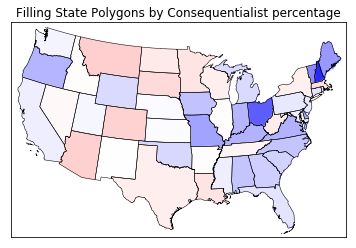

In [31]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

colors={}
statenames=[]
cmap = plt.cm.bwr # use 'hot' colormap
vmin = .46; vmax = 1 # set range.
#print(m.states_info)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        #change state name to stae initials
        state_initial = us_state_abbrev[statename]
        pop = statePercentages[state_initial]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        #colors[statename] = cmap(1.-(np.sqrt((pop-vmin)/(vmax-vmin))))[:3]
        colors[statename] = cmap((pop-vmin)/(vmax-vmin))
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

#plt.colorbar(m)
#plt.colorbar()
plt.title('Filling State Polygons by Consequentialist percentage')
#plt.show()
plt.savefig("map.png")

In [4]:
clf, vectorizer = getClassifierAndVectorizer()
coef = clf.coef_[0].tolist()
print(len(coef))
top = 50
predictors = []
deon_dic = dict()
cons_dic = dict()
n_grams = vectorizer.get_feature_names()
print(len(n_grams))
print(len(coef))
for i in range(top):
    val = min(coef)
    index = coef.index(val)
    predictors.append([n_grams[index], val])
    if i > 1:   #because we are having trouble deleting '\xe2\x80\x94' b/c weird escape sequence stuff
        cons_dic[n_grams[index]] = abs(val)
    n_grams.pop(index)
    coef.pop(index)
for i in range(top):
    val = max(coef)
    index = coef.index(val)
    predictors.append([n_grams[index], val])
    deon_dic[n_grams[index]] = abs(val)
    n_grams.pop(index)
    coef.pop(index)


imported correctly
259186
259186
259186


In [5]:
wordcloud = WordCloud(background_color="white", height=400, width=800).fit_words(cons_dic)

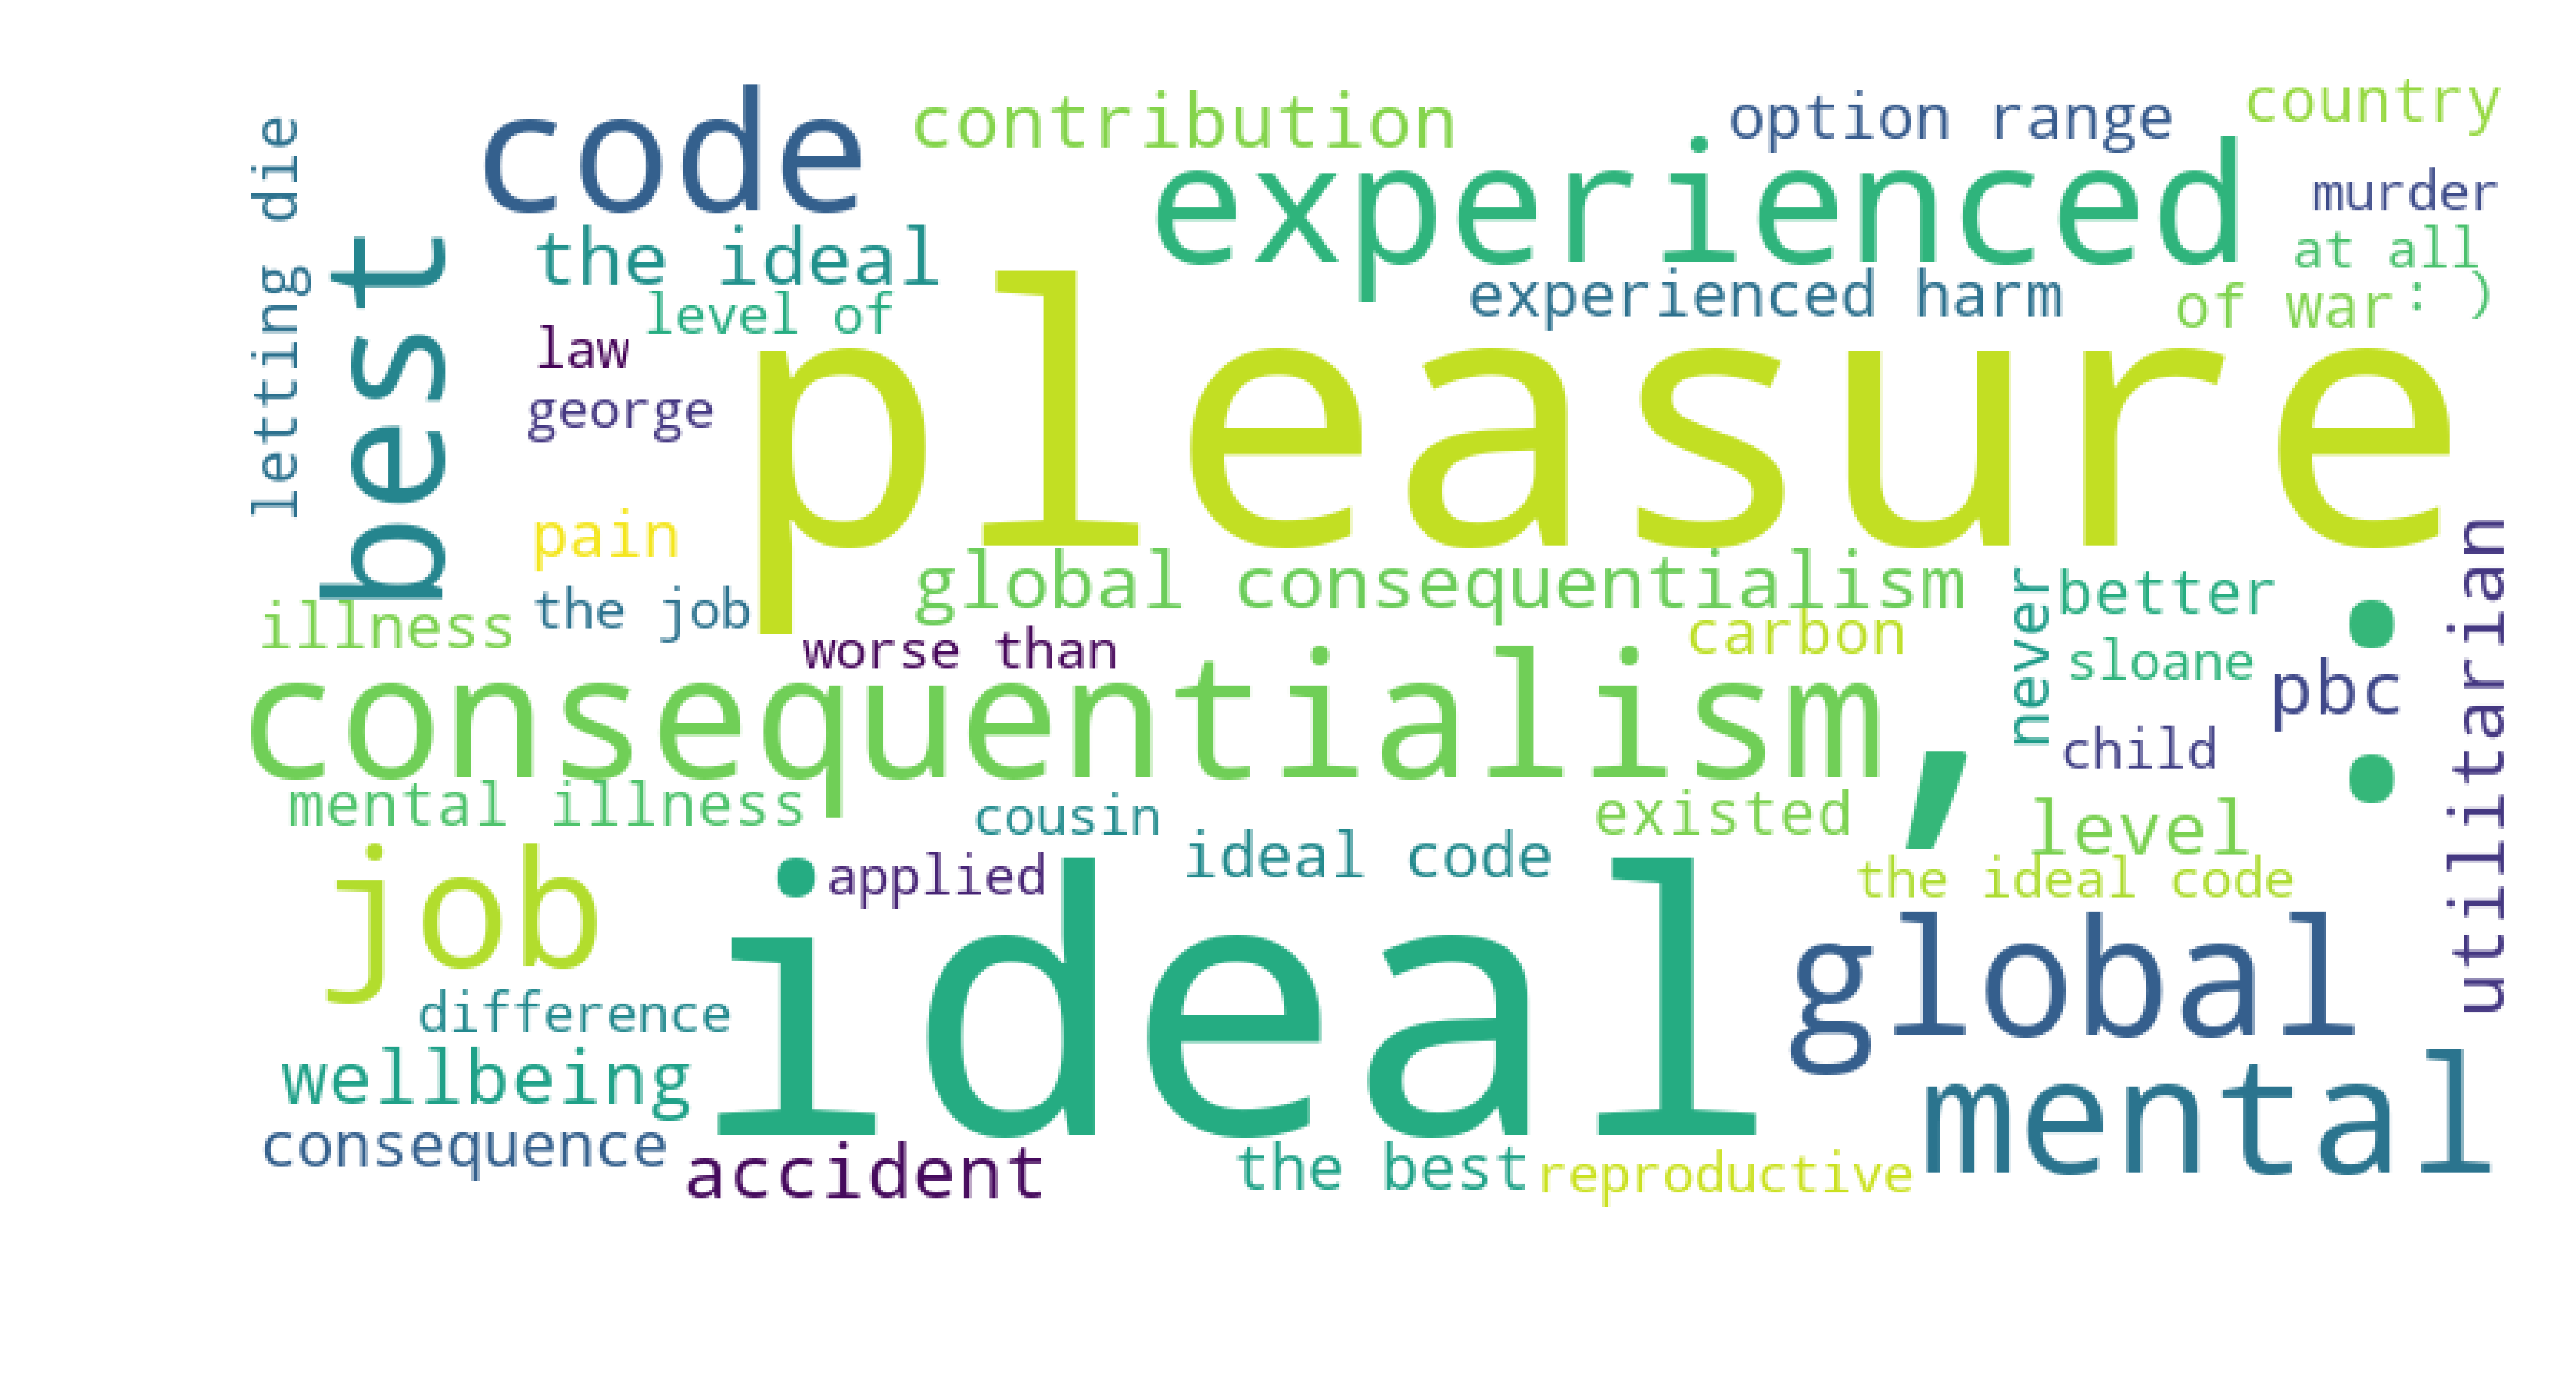

In [6]:
plt.figure(figsize=(6, 3), dpi=1000)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()